In [1]:
from nltk.tokenize import word_tokenize 
import nltk
import numpy as np
nltk.download('punkt')
import pandas as pd
train = pd.read_csv('./train.csv')

train.head()
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
nltk.download('punkt')
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix

!pip install gensim
import gensim
from gensim.models import Word2Vec

[nltk_data] Downloading package punkt to /Users/huangyue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/huangyue/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/huangyue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# Check for NaN values
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
# Check for duplicate values
train.duplicated().sum()

0

In [7]:
# Check to see if any reviews are blank strings and not just NaN
train[train['text'].str.isspace()]

,id,keyword,location,text,target


### EDA
#### Proportion of Labeled Tweets; Characters in Tweets; Distribution of Word Length; Punctuation Count Distribution; Top 30 Common Unigrams

In [8]:
train_copy = train.copy()

Text(0.5, 1.0, 'Target Count in Training Set')

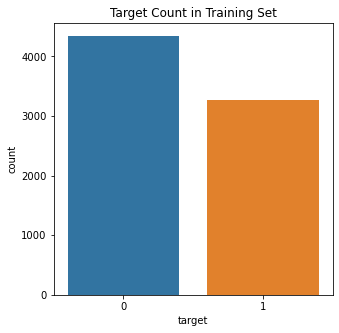

In [9]:
plt.figure(figsize=(5, 5))
sns.countplot(x = 'target', data=train_copy)
plt.title('Target Count in Training Set')

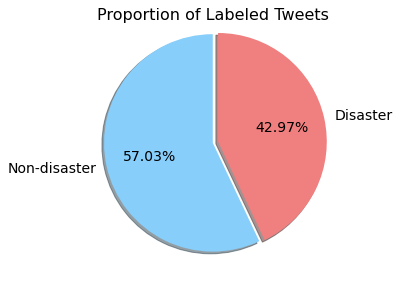

In [10]:
plt.figure(figsize=(10, 5))
colors = ['lightskyblue', 'lightcoral']
plt.pie(train_copy['target'].value_counts(), explode=(0, 0.05), labels=["Non-disaster", "Disaster"], 
        autopct="%0.2f%%", textprops={'fontsize': 14}, shadow=True, startangle=90, colors=colors)
plt.title('Proportion of Labeled Tweets', size=16, y=0.93)
plt.show()

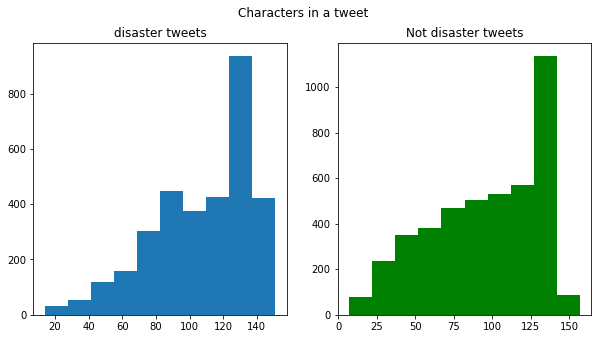

In [11]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
tweet_len=train_copy[train_copy['target']==1]['text'].map(lambda x: len(x))
ax1.hist(tweet_len)
ax1.set_title('disaster tweets')
tweet_len=train_copy[train_copy['target']==0]['text'].map(lambda x: len(x))
ax2.hist(tweet_len,color='green')
ax2.set_title('Not disaster tweets')
fig.suptitle('Characters in a tweet')
plt.show()

<ipython-input-12-61296d917a41>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
<ipython-input-12-61296d917a41>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')


Text(0.5, 0.98, 'Distribution of word length in each tweet')

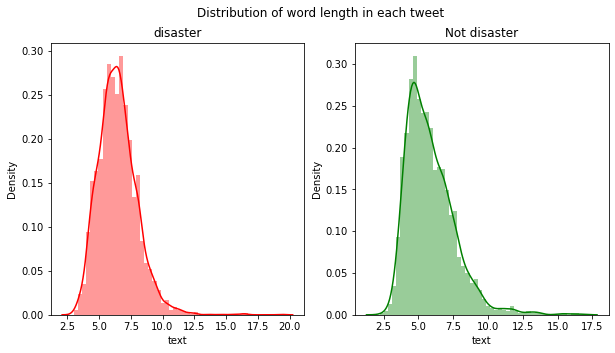

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=train_copy[train_copy['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('disaster')
word=train_copy[train_copy['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Not disaster')
fig.suptitle('Distribution of word length in each tweet')

<ipython-input-13-2d65f04e35ab>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_copy.loc[train_copy['target'] == 0]['punctuation_count'], color='green', kde_kws={'label':'Not disaster'})
<ipython-input-13-2d65f04e35ab>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_copy.loc[train_

Text(0.5, 1.0, 'Punctuation Count Distribution in Training Set')

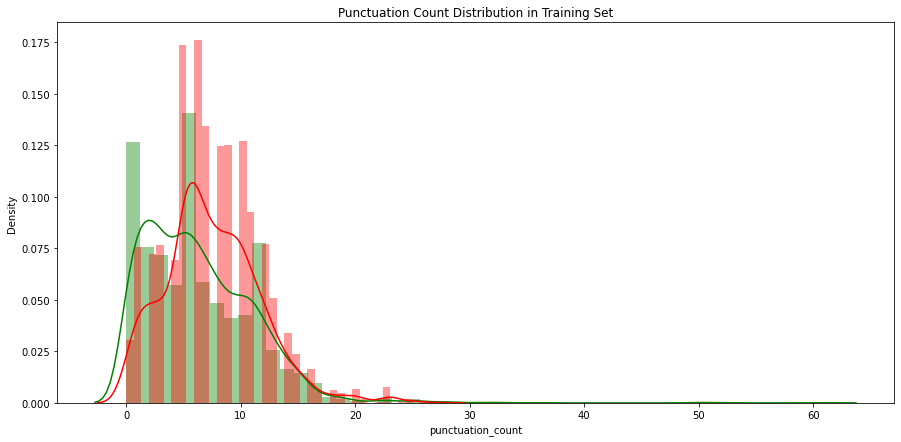

In [13]:
import string

train_copy['punctuation_count'] = train_copy['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

plt.figure(figsize=(15,7))
sns.distplot(train_copy.loc[train_copy['target'] == 0]['punctuation_count'], color='green', kde_kws={'label':'Not disaster'})
sns.distplot(train_copy.loc[train_copy['target'] == 1]['punctuation_count'], color='red', kde_kws={'label':'Disaster'})
plt.title('Punctuation Count Distribution in Training Set')

In [14]:
train_copy['text'] = [word_tokenize(train_copy.iloc[i, 3]) for i in range(len(train_copy))]

for i in range(len(train_copy)):
    train_copy['text'][i] = [train_copy['text'][i][j].lower() for j in range(len(train_copy.iloc[i,3]))]
    
for i in range(len(train_copy)):
    train_copy['text'][i] = [j for j in train_copy['text'][i] if j not in list(string.punctuation)]
    
for i in range(len(train_copy)):
    train_copy['text'][i] = [j for j in train_copy['text'][i] if j not in stopwords.words('english')]
    
lis = [train_copy[train_copy['target'] == 0]['text'], train_copy[train_copy['target'] == 1]['text']]

<ipython-input-14-b9c179a2cb40>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['text'][i] = [train_copy['text'][i][j].lower() for j in range(len(train_copy.iloc[i,3]))]
<ipython-input-14-b9c179a2cb40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_copy['text'][i] = [j for j in train_copy['text'][i] if j not in list(string.punctuation)]
<ipython-input-14-b9c179a2cb40>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


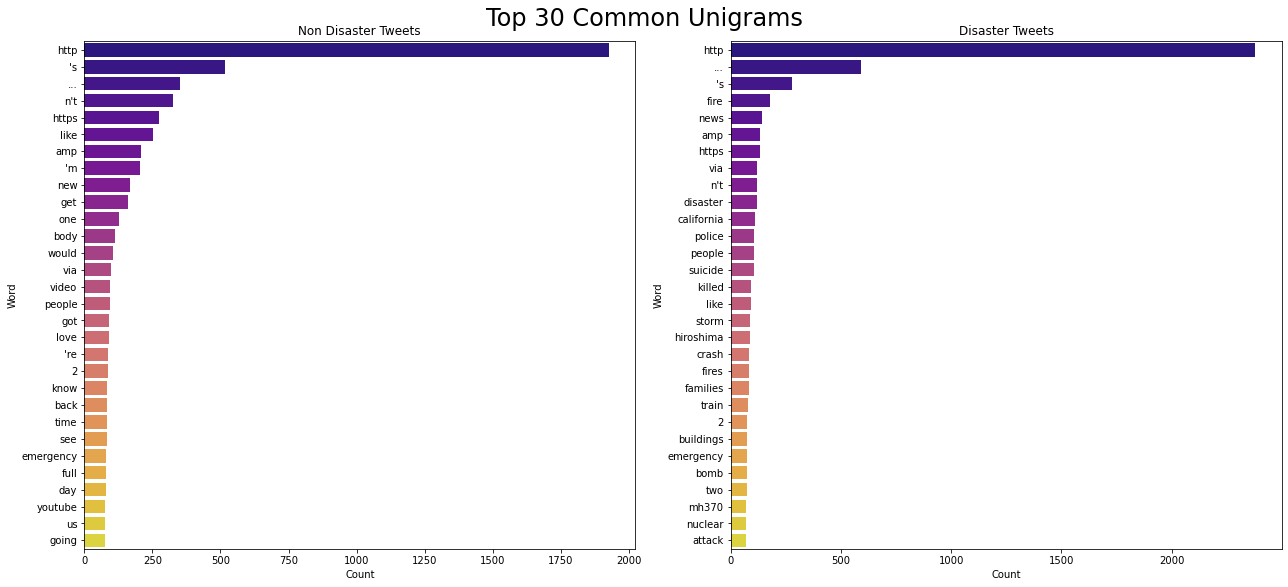

In [15]:
from collections import Counter

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
axes = axes.flatten()

for i, j in zip(lis, axes):

    new = i
    corpus = [word for i in new for word in i]

    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []
    for word, count in most[:30]:
        if (word not in stopwords.words('english')):
            x.append(word)
            y.append(count)

    sns.barplot(x=y, y=x, palette='plasma', ax=j)
axes[0].set_title('Non Disaster Tweets')

axes[1].set_title('Disaster Tweets')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Word')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Word')

fig.suptitle('Top 30 Common Unigrams', fontsize=24, va='baseline')
plt.tight_layout()

### NLP Clearning
#### Tokenizing; LowerCase; Remove Punctuations & Stopwords; Steming

In [4]:
def nlp(text_str):
    k = word_tokenize(text_str)
    for i in range(len(k)):
        k[i] = k[i].lower()
    k = [ps.stem(i) for i in k if i not in list(string.punctuation) and i not in stopwords.words('english')]
    k = " ".join(k)
    return k
for i in range(len(train['text'])):
    train['text'][i] = nlp(train['text'][i])


/var/folders/nr/r7m_ksxd1zj2ttsw9nprxcv00000gn/T/ipykernel_68451/4225160402.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['text'][i] = nlp(train['text'][i])


In [91]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

### NLP Cleaning without removing punctuations

In [90]:
def nlp_with_punc(text_str):
    k = word_tokenize(text_str)
    for i in range(len(k)):
        k[i] = k[i].lower()
    k = [ps.stem(i) for i in k if i not in stopwords.words('english')]
    k = " ".join(k)
    return k
with_punk_list = []
for i in range(len(train['text'])):
    with_punk_list.append(nlp_with_punc(train['text'][i]))
with_punk_list

['deed reason # earthquak may allah forgiv us',
 'forest fire near la rong sask . canada',
 "resid ask 'shelter place ' notifi offic . evacu shelter place order expect",
 '13,000 peopl receiv # wildfir evacu order california',
 'got sent photo rubi # alaska smoke # wildfir pour school',
 '# rockyfir updat = > california hwi . 20 close direct due lake counti fire - # cafir # wildfir',
 '# flood # disast heavi rain caus flash flood street manit , colorado spring area',
 "'m top hill see fire wood ...",
 "'s emerg evacu happen build across street",
 "'m afraid tornado come area ...",
 'three peopl die heat wave far',
 'haha south tampa get flood hah- wait second live south tampa gon na gon na fvck # flood',
 "# rain # flood # florida # tampabay # tampa 18 19 day . 've lost count",
 '# flood bago myanmar # arriv bago',
 'damag school bu 80 multi car crash # break',
 "'s man ?",
 'love fruit',
 'summer love',
 'car fast',
 'goooooooaaaaaal ! ! ! ! ! !',
 'ridicul ....',
 'london cool ; )',


### Word2Vec

In [25]:
text_list = []
for i in train['text']:
    k = word_tokenize(i)
    text_list.append(k)
w2v_model = Word2Vec(text_list)
w2v_model.vector_size
#MeanEmbeddingVectorizer(w2v_model)
len_train = int(len(train['text'])*0.8)
print(len_train)
words = set(w2v_model.wv.index_to_key)
X_train_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in train['text'][:len_train]])

X_test_vect = np.array([np.array([w2v_model.wv[i] for i in ls if i in words])
                         for ls in train['text'][len_train:]])

In [85]:
w2v_model.wv.most_similar('disaster')

[('site', 0.9986717700958252),
 ('Obama', 0.9982538819313049),
 ('On', 0.9982209801673889),
 ('security', 0.998143196105957),
 ('Storm', 0.9979630708694458),
 ('Report', 0.9979050159454346),
 ('From', 0.9978207945823669),
 ('New', 0.9978201389312744),
 ('S', 0.9977688789367676),
 ('Hijack', 0.9976590275764465)]

In [77]:
# Compute sentence vectors by averaging the word vectors for the words contained in the sentence
X_train_vect_avg = []
for v in X_train_vect:
    if v.size:
        X_train_vect_avg.append(v.mean(axis=0))
    else:
        X_train_vect_avg.append(np.zeros(100, dtype=float))
        
X_test_vect_avg = []
for v in X_test_vect:
    if v.size:
        X_test_vect_avg.append(v.mean(axis=0))
    else:
        X_test_vect_avg.append(np.zeros(100, dtype=float))

len(X_train_vect_avg)

5329

### Transform sentences to matrix of word counts

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
tfidf.fit(train['text'])
x_train = tfidf.transform(train['text'])
x_train
y_train = train['target']

In [70]:
len_train = int(x_train.shape[0]*0.7)
train_x = x_train[:len_train]
test_x = x_train[len_train:]
train_y = y_train[:len_train]
test_y =  y_train[len_train:]

### Transform sentences without moving punctuations to matrix of word counts

In [99]:
tfidf.fit(with_punk_list)
x_train = tfidf.transform(with_punk_list)

train_x_punc = x_train[:len_train]
test_x_punc = x_train[len_train:]
train_y = y_train[:len_train]
test_y =  y_train[len_train:]

In [100]:
train_x_punc

<5329x18816 sparse matrix of type '<class 'numpy.float64'>'
	with 58124 stored elements in Compressed Sparse Row format>

### Naive Bayes

In [54]:
train_x.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [105]:
#Naive Bayes for tf-idf
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(train_x.toarray(), train_y)
y_pred_test = classifier.predict(test_x.toarray())
y_pred_train = classifier.predict(train_x.toarray())
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.9605929817977107
Accuracy: 0.6120840630472855


<AxesSubplot: >

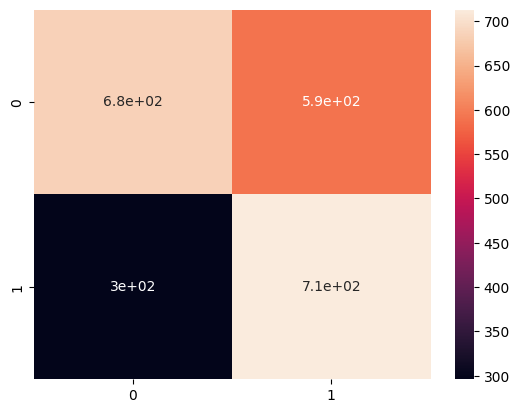

In [56]:
import seaborn as sns
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

In [66]:
X_train_vect[0]

array([[-0.20169179,  0.27885988,  0.08910833, ..., -0.2399228 ,
        -0.00101684, -0.0910897 ],
       [-0.05602687,  0.05526017,  0.00284927, ..., -0.06311652,
         0.03180394,  0.01191666],
       [-0.04685591,  0.03181419,  0.00538342, ..., -0.04109437,
         0.02210351,  0.00295516],
       ...,
       [-0.20169179,  0.27885988,  0.08910833, ..., -0.2399228 ,
        -0.00101684, -0.0910897 ],
       [-0.0443688 ,  0.0410972 , -0.00447034, ..., -0.04971872,
         0.03316927,  0.02412971],
       [-0.13232048,  0.2052962 ,  0.24508162, ..., -0.23680617,
        -0.0272199 , -0.15659897]], dtype=float32)

In [73]:
len(X_train_vect_avg)

6090

### Naive Bayes for Word2Vec

In [78]:
#Naive Bayes for Word2Vec
classifier = GaussianNB()
classifier.fit(X_train_vect_avg, train_y)
y_vect_test = classifier.predict(X_test_vect_avg)
y_vect_train = classifier.predict(X_train_vect_avg)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(train_y, y_vect_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_vect_test))

Accuracy: 0.5047851379245637
Accuracy: 0.5280210157618214


### Naive Bayes for TFIDF without removing punctuation

In [106]:
### Naive Bayes for TFIDF without removing punctuation
classifier = GaussianNB()
classifier.fit(train_x_punc.toarray(), train_y)
y_pred_test = classifier.predict(test_x_punc.toarray())
y_pred_train = classifier.predict(train_x_punc.toarray())
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.9485832238693939
Accuracy: 0.5818739054290718


### False Positive: 680; False Negative: 280

### Random Forest Classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123,
                                max_depth = 50)
forest.fit(train_x, train_y)

RandomForestClassifier(max_depth=50, random_state=123)

In [12]:
from sklearn import metrics
y_pred_test = forest.predict(test_x)
y_pred_train = forest.predict(train_x)
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8474385438168512
Accuracy: 0.7193520140105079


<AxesSubplot: >

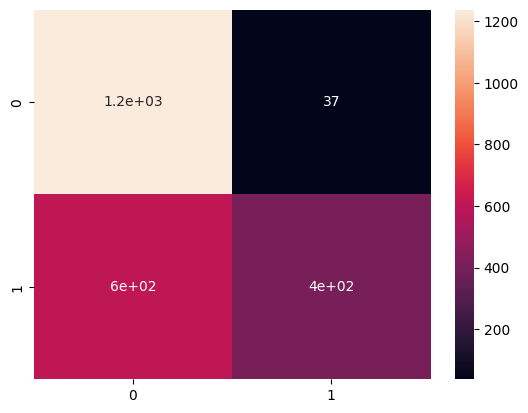

In [13]:
import seaborn as sns
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

### False Positive: 37; False Negative: 600

In [79]:
#Random Forest for Word2Vec
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123,
                                max_depth = 50)
forest.fit(X_train_vect_avg, train_y)
y_vect_test = forest.predict(X_test_vect_avg)
y_vect_train = forest.predict(X_train_vect_avg)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(train_y, y_vect_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_vect_test))

Accuracy: 0.9966222555826609
Accuracy: 0.648861646234676


<AxesSubplot: >

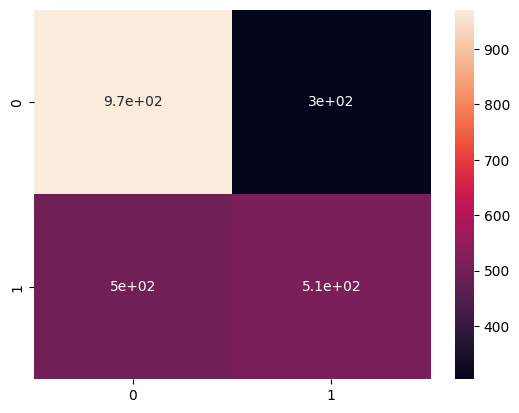

In [80]:
cf_matrix = confusion_matrix(test_y, y_vect_test)
sns.heatmap(cf_matrix, annot=True)

### Random Forest for TFIDF without removing punctuation

In [103]:
### Random Forest for TFIDF without removing punctuation
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123,
                                max_depth = 50)
forest.fit(train_x_punc.toarray(), train_y)
y_pred_test = forest.predict(test_x_punc.toarray())
y_pred_train = forest.predict(train_x_punc.toarray())
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8474385438168512
Accuracy: 0.7193520140105079


# Cat Boost

In [82]:
from catboost import CatBoostClassifier
cat_boost = CatBoostClassifier(verbose=0, random_state = 123)
cat_boost.fit(train_x, train_y)

In [15]:
y_pred_test = cat_boost.predict(test_x)
y_pred_train = cat_boost.predict(train_x)
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8525051604428598
Accuracy: 0.7132224168126094


<AxesSubplot: >

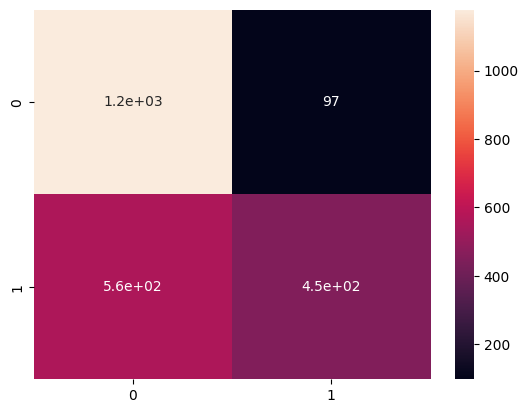

In [16]:
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

### False Positive: 97; False Negative: 560

### CATBoost for Word2Vec

In [83]:
#CATBoost for Word2Vec
cat_boost = CatBoostClassifier(verbose=0, random_state = 123)
cat_boost.fit(X_train_vect_avg, train_y)

y_vect_test = cat_boost.predict(X_test_vect_avg)
y_vect_train = cat_boost.predict(X_train_vect_avg)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(train_y, y_vect_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_vect_test))

Accuracy: 0.8286732970538563
Accuracy: 0.6690017513134852


<AxesSubplot: >

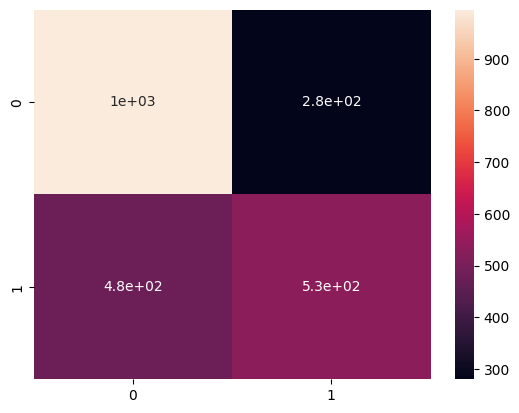

In [84]:
cf_matrix = confusion_matrix(test_y, y_vect_test)
sns.heatmap(cf_matrix, annot=True)

### CatBoost for TFIDF without removing punctuation

In [104]:
### CatBoost for TFIDF without removing punctuation
cat_boost = CatBoostClassifier(verbose=0, random_state = 123)
cat_boost.fit(train_x_punc.toarray(), train_y)
y_pred_test = cat_boost.predict(test_x_punc.toarray())
y_pred_train = cat_boost.predict(train_x_punc.toarray())
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8525051604428598
Accuracy: 0.7132224168126094


# XGBoost  (Took a long time to run)

In [17]:
from xgboost import XGBClassifier
xg_classifier1 = XGBClassifier(random_state = 123)
xg_classifier1.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=123, ...)

In [18]:
y_pred_test = xg_classifier1.predict(test_x)
y_pred_train = xg_classifier1.predict(train_x)
print("Accuracy:",metrics.accuracy_score(train_y, y_pred_train))
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_test))

Accuracy: 0.8768999812347532
Accuracy: 0.7298598949211909


<AxesSubplot: >

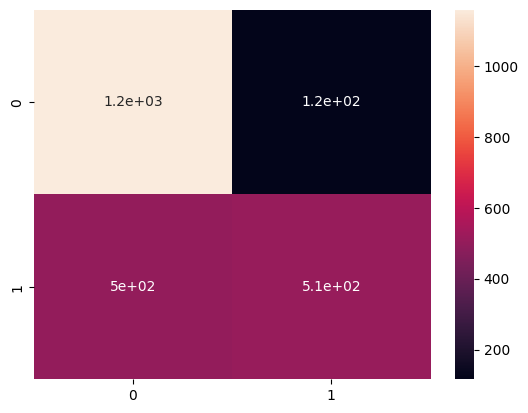

In [19]:
cf_matrix = confusion_matrix(test_y, y_pred_test)
sns.heatmap(cf_matrix, annot=True)

### False Positive: 120; False Negative: 500